In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [16]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [17]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df.columns = ['labels', 'data']

In [20]:
df.shape

(5572, 2)

In [21]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [22]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size = 0.33)

In [23]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [24]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens. ' % V)

Found 7275 unique tokens. 


In [25]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor: ', data_train.shape)

T = data_train.shape[1]

Shape of data train tensor:  (3733, 189)


In [26]:
data_test = pad_sequences(sequences_test, maxlen = T)
print('Shape of data test tensor: ', data_test.shape)

Shape of data test tensor:  (1839, 189)


In [27]:
# Create the model

# We get to choose embedding dimensionality
D = 20 # this is hyperparameter

#Hidden state dimensionality
M = 15 # this is hyperparameter

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V+ 1.

i = Input(shape = (T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences = True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

In [28]:
# Compile and fit
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


print('Training model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs = 10,
    validation_data = (data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 7s 20ms/step - loss: 0.4471 - accuracy: 0.8671 - val_loss: 0.3905 - val_accuracy: 0.8635
Epoch 2/10
117/117 [==============================] - 2s 16ms/step - loss: 0.3554 - accuracy: 0.8671 - val_loss: 0.3289 - val_accuracy: 0.8635
Epoch 3/10
117/117 [==============================] - 2s 16ms/step - loss: 0.2737 - accuracy: 0.8671 - val_loss: 0.2548 - val_accuracy: 0.8635
Epoch 4/10
117/117 [==============================] - 2s 16ms/step - loss: 0.1885 - accuracy: 0.8993 - val_loss: 0.2019 - val_accuracy: 0.9505
Epoch 5/10
117/117 [==============================] - 2s 16ms/step - loss: 0.1213 - accuracy: 0.9845 - val_loss: 0.1488 - val_accuracy: 0.9630
Epoch 6/10
117/117 [==============================] - 2s 16ms/step - loss: 0.0706 - accuracy: 0.9890 - val_loss: 0.1119 - val_accuracy: 0.9690
Epoch 7/10
117/117 [==============================] - 2s 17ms/step - loss: 0.0447 - accuracy: 0.9920 - val_loss: 0.0955 - va

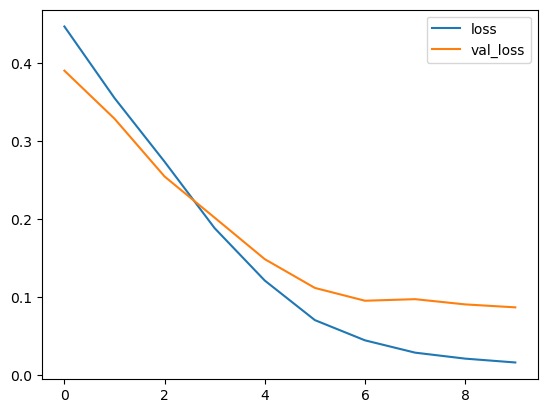

In [29]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

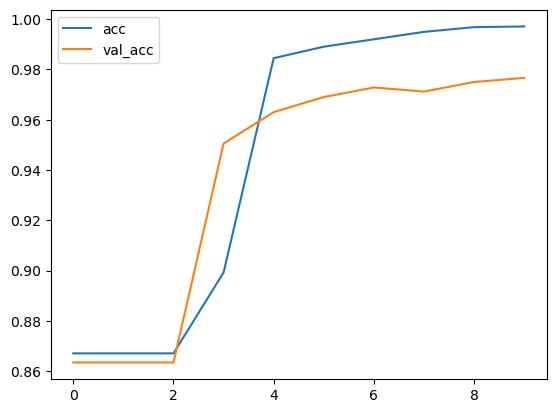

In [30]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [31]:
model.predict(data_test)

58/58 [==============================] - 1s 5ms/step


array([[0.00425032],
       [0.00453081],
       [0.00575517],
       ...,
       [0.00427247],
       [0.00419384],
       [0.00528011]], dtype=float32)

In [41]:
sample_text = ["Free money! Money Viagra!"]

In [42]:
sequences_sample = tokenizer.texts_to_sequences(sample_text)

In [43]:
data_sample = pad_sequences(sequences_sample, maxlen = T)
print('Shape of data test tensor: ', data_sample.shape)

Shape of data test tensor:  (1, 189)


In [44]:
model.predict(data_sample)

1/1 [==============================] - 0s 24ms/step


array([[0.5500247]], dtype=float32)